## Cargamos los datos

In [49]:
import tensorflow.keras as tf_keras
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [50]:
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

In [51]:
print(train_data.shape)
print(train_labels.shape)

(404, 13)
(404,)


In [52]:
print(train_data[0])
print(train_labels[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


## Normalizamos los datos

> Dato que desconocia: <br>
> Se usa la media y std de el de entranamiento y no de test, porque produce datalake

In [53]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean)/std
test_data = (test_data - mean)/std

## Modelo

In [54]:
train_data.shape

(404, 13)

In [55]:
def build_model(lr_var, input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.RMSprop(learning_rate=lr_var), loss='mse', metrics=['mae'])
    
    return model

In [56]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 85
all_histories = []

In [57]:
for i in range(k):
    print('Fold: ',i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_labels = train_labels[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)    
    partial_train_labels = np.concatenate([train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]], axis=0)
    
    model = build_model(0.001,13)   
    hist = model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=16, validation_data=(val_data, val_labels))
    
    all_histories.append(hist.history['val_mae'])
    

Fold:  0
Epoch 1/85


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 548.0097 - mae: 21.6579 - val_loss: 477.5364 - val_mae: 19.6965
Epoch 2/85
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 446.2979 - mae: 19.4241 - val_loss: 360.0592 - val_mae: 16.7947
Epoch 3/85
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 342.4305 - mae: 16.6096 - val_loss: 232.4921 - val_mae: 13.1472
Epoch 4/85
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 203.5797 - mae: 12.2699 - val_loss: 114.4502 - val_mae: 8.6953
Epoch 5/85
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.4946 - mae: 9.0333 - val_loss: 53.2425 - val_mae: 5.5273
Epoch 6/85
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.3908 - mae: 6.1133 - val_loss: 34.6102 - val_mae: 4.3099
Epoch 7/85
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.4545 - mae: 4.8701 - val_loss: 27.6244 - val_mae: 3.8034
Epoch 8/85
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.3203 - mae: 4.2606 - val_loss: 24.3270 - val_mae: 3.5565
Epoch 9/85
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [58]:
all_mea_avg = pd.DataFrame(all_histories).mean(axis=0)
all_mea_avg

0     19.867850
1     16.614755
2     12.603084
3      8.594859
4      6.143659
        ...    
80     2.328753
81     2.442201
82     2.342058
83     2.354277
84     2.345186
Length: 85, dtype: float64

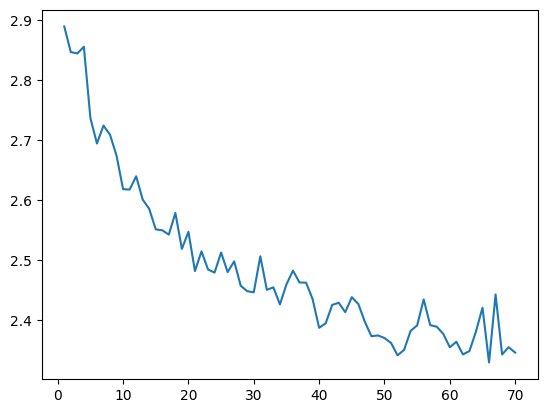

In [59]:
plt.plot(range(1,len(all_mea_avg[15:])+1), all_mea_avg[15:])
plt.show()

In [60]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.5832 - mae: 2.4773


[17.61391830444336, 2.693598508834839]